In [7]:
import os
import pandas as pd

In [12]:
# 파일명 변경

folder_names = os.listdir('./data/')

for folder_name in folder_names:
    file_names = os.listdir(f'./data/{folder_name}')
    for file_name in file_names:
        split_file_name = file_name.replace('.csv','').split('_')
        os.rename(f'./data/{folder_name}/{file_name}',f'./data/{folder_name}/{folder_name}_{split_file_name[1]}.csv')

### 데이터프레임 합치기
### 관광지 기본정보

In [ ]:
folder_names = os.listdir('./data/')
folder_names

In [3]:
basic_info = pd.DataFrame()

for folder_name in folder_names:
    df = pd.read_csv(f'./data/{folder_name}/{folder_name}_관광지 기본정보.csv',encoding='ANSI')
    basic_info = pd.concat([basic_info,df],ignore_index=True)

In [4]:
basic_info

,관광지명,주소,평균 체류시간
0,168계단,부산광역시 동구,3시간 4분
1,40계단문화관광테마거리,부산광역시 중구,1시간 36분
2,BIFF광장,부산광역시 중구,1시간 22분
3,KT&G상상마당부산,부산광역시 부산진구,1시간 28분
4,SEALIFE부산아쿠아리움,부산광역시 해운대구,0시간 59분
...,...,...,...
234,화명수목원,부산광역시 북구,1시간 8분
235,화전공원,부산광역시 강서구,2시간 53분
236,황령산,부산광역시 부산진구,2시간 1분
237,황령산전망대,부산광역시 남구,0시간 38분


In [223]:
basic_info.to_csv('./basic_info.csv',encoding='utf-8')

### 데이터프레임 합치기

### 내비게이션

In [176]:
folder_names = os.listdir('./zipfile/data/')
len(folder_names)

239

In [177]:
navi_info = pd.DataFrame()

for folder_name in folder_names:
    df = pd.read_csv(f'./zipfile/data/{folder_name}/{folder_name}_내비게이션 목적지 검색량 추이.csv',encoding='ANSI',index_col=0)
    df = df.rename(columns={df.columns[0] : folder_name}).transpose()
    df['관광지명'] = folder_name
    navi_info = pd.concat([navi_info,df])

In [178]:
navi_info.to_csv('./data_2/navi_info.csv',encoding='utf-8',index=False)

In [5]:
navi_info = pd.DataFrame()

for folder_name in folder_names:
    df = pd.read_csv(f'./data/{folder_name}/{folder_name}_내비게이션 목적지 검색량 추이.csv',encoding='ANSI',index_col=0)
    df = df.rename(columns={df.columns[0] : folder_name}).transpose()
    navi_info = pd.concat([navi_info,df])

In [179]:
navi_info

,202301,202302,202303,202304,202305,202306,202307,202308,202309,202310,202311,202312,관광지명
168계단,26.0,30.0,23.0,12.0,14.0,15.0,25.0,12.0,3.0,16.0,14.0,13.0,168계단
40계단문화관광테마거리,16.0,31.0,33.0,NaN,NaN,6.0,NaN,16.0,40.0,35.0,59.0,29.0,40계단문화관광테마거리
BIFF광장,398.0,397.0,278.0,NaN,NaN,29.0,8.0,112.0,321.0,444.0,327.0,480.0,BIFF광장
KT&G상상마당부산,1402.0,1185.0,928.0,1094.0,1642.0,3050.0,3621.0,3813.0,2545.0,2042.0,1438.0,1944.0,KT&G상상마당부산
SEALIFE부산아쿠아리움,4067.0,4155.0,2768.0,3603.0,5161.0,3709.0,5612.0,6673.0,3656.0,3148.0,2701.0,4588.0,SEALIFE부산아쿠아리움
...,...,...,...,...,...,...,...,...,...,...,...,...,...
화명수목원,602.0,766.0,1340.0,1791.0,1541.0,1555.0,1003.0,997.0,1136.0,1992.0,1923.0,664.0,화명수목원
화전공원,32.0,38.0,25.0,NaN,NaN,19.0,NaN,22.0,24.0,34.0,50.0,22.0,화전공원
황령산,425.0,416.0,569.0,NaN,NaN,66.0,22.0,148.0,500.0,608.0,527.0,449.0,황령산
황령산전망대,2587.0,2303.0,3700.0,3144.0,2447.0,2670.0,2464.0,3278.0,3297.0,3826.0,3130.0,2780.0,황령산전망대


In [7]:
navi_info.to_csv('./navi_info.csv',encoding='utf-8',index=False)

### 데이터프레임 합치기
### 방문자 거주지별 분포

In [8]:

new_order = ['관광지명','광역지자체명', '기초지자체명', '광역지자체별 거주 방문자 비율', '기초지자체별 거주 방문자 비율']

visit_info = pd.DataFrame()

for folder_name in folder_names:
    df = pd.read_csv(f'./data/{folder_name}/{folder_name}_방문자 거주지별 분포.csv',encoding='ANSI')
    df['관광지명'] = folder_name
    df = df[new_order]
    
    visit_info = pd.concat([visit_info,df],ignore_index=True)

In [12]:
visit_info

,관광지명,광역지자체명,기초지자체명,광역지자체별 거주 방문자 비율,기초지자체별 거주 방문자 비율
0,168계단,강원특별자치도,평창군,0.6,6.4
1,168계단,강원특별자치도,태백시,0.6,5.7
2,168계단,강원특별자치도,삼척시,0.6,25.8
3,168계단,강원특별자치도,강릉시,0.6,8.2
4,168계단,강원특별자치도,영월군,0.6,0.4
...,...,...,...,...,...
56694,흰여울문화마을,충청북도,옥천군,2.1,2.9
56695,흰여울문화마을,충청북도,증평군,2.1,2.1
56696,흰여울문화마을,충청북도,괴산군,2.1,1.3
56697,흰여울문화마을,충청북도,단양군,2.1,0.9


In [10]:
visit_info.to_csv('./visit_info.csv',encoding='utf-8',index=False)

### 데이터프레임 합치기
### 성별

In [ ]:
folder_names = os.listdir('./busan_zipfile/data/')
len(folder_names)

In [59]:
new_order = ['관광지명','연령대', '남성방문 비율', '여성방문 비율']

gender_info = pd.DataFrame()

for folder_name in folder_names:
    df = pd.read_csv(f'./busan_zipfile/data/{folder_name}/{folder_name}_성·연령별 방문자.csv',encoding='ANSI')
    df['관광지명'] = folder_name
    df = df[new_order]
    
    gender_info = pd.concat([gender_info,df],ignore_index=True)

In [60]:
gender_info

,관광지명,연령대,남성방문 비율,여성방문 비율
0,168계단,70세 이상,7.1,8.4
1,168계단,60~69세,8.5,8.6
2,168계단,50~59세,8.6,10.3
3,168계단,40~49세,7.1,7.7
4,168계단,30~39세,6.8,5.9
...,...,...,...,...
1906,흰여울문화마을,40~49세,4.8,6.6
1907,흰여울문화마을,30~39세,8.0,8.8
1908,흰여울문화마을,20~29세,12.2,20.6
1909,흰여울문화마을,10~19세,2.6,4.3


In [61]:
gender_info.to_csv('./data_2/gender_info.csv',encoding='utf-8',index=False)

==================================================================================================

==================================================================================================

==================================================================================================

In [4]:
import pandas as pd

basic_info = pd.read_csv('./data_2/basic_info.csv')
basic_info

,Unnamed: 0,관광지명,주소,평균 체류시간
0,0,168계단,부산광역시 동구,3시간 4분
1,1,40계단문화관광테마거리,부산광역시 중구,1시간 36분
2,2,BIFF광장,부산광역시 중구,1시간 22분
3,3,KT&G상상마당부산,부산광역시 부산진구,1시간 28분
4,4,SEALIFE부산아쿠아리움,부산광역시 해운대구,0시간 59분
...,...,...,...,...
234,234,화명수목원,부산광역시 북구,1시간 8분
235,235,화전공원,부산광역시 강서구,2시간 53분
236,236,황령산,부산광역시 부산진구,2시간 1분
237,237,황령산전망대,부산광역시 남구,0시간 38분


In [5]:
stars = []
reviews = []

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service


for i in basic_info['관광지명']:
    url = f'https://www.google.co.kr/maps/search/{i}'
    service = Service(executable_path='./data/chromedriver.exe')
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
    
    try:
        # 해당 클래스명이 나타날 때까지 최대 10초 대기
        element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, 'F7nice'))
        )
        
        star = element.text.split('\n')[0]
        review = element.text.split('\n')[1][1:-1]
        
        stars.append(star)
        reviews.append(review)
    except:
        check = input('일치하는 장소를 클릭 후 y를 눌러주세요(이외 None)')
        if check.upper() == 'Y':
            star = driver.find_element(By.CLASS_NAME, 'F7nice').text.split('\n')[0]
            review = driver.find_element(By.CLASS_NAME, 'F7nice').text.split('\n')[1][1:-1]
            
            stars.append(star)
            reviews.append(review)
        else:
            stars.append(None)
            reviews.append(None)
    
    driver.quit()
    print(f'평점 수 : {len(stars)}','|',f'리뷰 수 : {len(reviews)}','|',f'관광지 명 : {i}','|', f'별점 : {star}','|',f'리뷰 : {review}')
    
    star = None
    review = None

In [8]:
print(f'총 데이터 수 : {len(basic_info)}')
print('=========================================')
print(f'평점 수 : {len(stars)}')
print(f'리뷰 수 : {len(reviews)}')
print('=========================================')
print(f'총 None값 수 : {stars.count(None)}')
print(f'총 None값 수 : {reviews.count(None)}')

총 데이터 수 : 239
평점 수 : 239
리뷰 수 : 239
총 None값 수 : 6
총 None값 수 : 6


In [11]:
basic_info['stars'] = stars
basic_info['reviews'] = reviews

In [18]:
basic_info = basic_info.drop('Unnamed: 0',axis=1)

In [22]:
basic_info.to_csv('./basic_info_with_reviews.csv',encoding='utf-8',index=False)

==============================================================================================================================

==============================================================================================================================

==============================================================================================================================

### 리뷰, 체류시간 -> 숫자 값으로 변경

In [181]:
import pandas as pd

basic_info = pd.read_csv('./data_2/basic_info_with_reviews.csv')
gender_info = pd.read_csv('./data_2/gender_info.csv')
navi_info = pd.read_csv('./data_2/navi_info.csv')
visit_info = pd.read_csv('./data_2/visit_info.csv')

In [46]:
time = []

for i in basic_info['평균 체류시간']:
    i = i.replace('시간','').replace('분','').strip()
    i = i.split(' ')
    time.append((int(i[0]) * 60) + int(i[1]))
    
basic_info['평균 체류시간'] = time

In [69]:
reviews_to_int = []

for i in basic_info['reviews']:
    if type(i) == float:
        reviews_to_int.append(i)
    else:
        i = i.replace(',','')
        i = int(i)
        reviews_to_int.append(i)

basic_info['reviews'] = reviews_to_int

In [76]:
basic_info.to_csv('./data_2/basic_info_with_reviews.csv',encoding='utf-8',index=False)

### None값 -> 관광지별 평균

In [182]:
new_order = ['관광지명','202301', '202302', '202303', '202304', '202305', '202306', '202307','202308', '202309', '202310', '202311', '202312']
navi_info = navi_info[new_order]

In [183]:
navi_info.set_index('관광지명',inplace=True)

In [184]:
navi_info

,202301,202302,202303,202304,202305,202306,202307,202308,202309,202310,202311,202312
관광지명,,,,,,,,,,,,
168계단,26.0,30.0,23.0,12.0,14.0,15.0,25.0,12.0,3.0,16.0,14.0,13.0
40계단문화관광테마거리,16.0,31.0,33.0,NaN,NaN,6.0,NaN,16.0,40.0,35.0,59.0,29.0
BIFF광장,398.0,397.0,278.0,NaN,NaN,29.0,8.0,112.0,321.0,444.0,327.0,480.0
KT&G상상마당부산,1402.0,1185.0,928.0,1094.0,1642.0,3050.0,3621.0,3813.0,2545.0,2042.0,1438.0,1944.0
SEALIFE부산아쿠아리움,4067.0,4155.0,2768.0,3603.0,5161.0,3709.0,5612.0,6673.0,3656.0,3148.0,2701.0,4588.0
...,...,...,...,...,...,...,...,...,...,...,...,...
화명수목원,602.0,766.0,1340.0,1791.0,1541.0,1555.0,1003.0,997.0,1136.0,1992.0,1923.0,664.0
화전공원,32.0,38.0,25.0,NaN,NaN,19.0,NaN,22.0,24.0,34.0,50.0,22.0
황령산,425.0,416.0,569.0,NaN,NaN,66.0,22.0,148.0,500.0,608.0,527.0,449.0


In [170]:
int(navi_info.iloc[1].mean())

29

In [185]:
navi_info = navi_info.apply(lambda row: row.fillna(int(row.mean())), axis=1)

In [186]:
navi_info.to_csv('./data_2/navi_info.csv',encoding='utf-8',index=True)

In [188]:
navi_info = pd.read_csv('./data_2/navi_info.csv')
navi_info

,관광지명,202301,202302,202303,202304,202305,202306,202307,202308,202309,202310,202311,202312
0,168계단,26.0,30.0,23.0,12.0,14.0,15.0,25.0,12.0,3.0,16.0,14.0,13.0
1,40계단문화관광테마거리,16.0,31.0,33.0,29.0,29.0,6.0,29.0,16.0,40.0,35.0,59.0,29.0
2,BIFF광장,398.0,397.0,278.0,279.0,279.0,29.0,8.0,112.0,321.0,444.0,327.0,480.0
3,KT&G상상마당부산,1402.0,1185.0,928.0,1094.0,1642.0,3050.0,3621.0,3813.0,2545.0,2042.0,1438.0,1944.0
4,SEALIFE부산아쿠아리움,4067.0,4155.0,2768.0,3603.0,5161.0,3709.0,5612.0,6673.0,3656.0,3148.0,2701.0,4588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,화명수목원,602.0,766.0,1340.0,1791.0,1541.0,1555.0,1003.0,997.0,1136.0,1992.0,1923.0,664.0
235,화전공원,32.0,38.0,25.0,29.0,29.0,19.0,29.0,22.0,24.0,34.0,50.0,22.0
236,황령산,425.0,416.0,569.0,373.0,373.0,66.0,22.0,148.0,500.0,608.0,527.0,449.0
237,황령산전망대,2587.0,2303.0,3700.0,3144.0,2447.0,2670.0,2464.0,3278.0,3297.0,3826.0,3130.0,2780.0


==============================================================================================================================

==============================================================================================================================

==============================================================================================================================

In [6]:
import requests
from bs4 import BeautifulSoup
import time

In [15]:
url = 'https://datalab.visitkorea.or.kr/visualize/getTempleteData.do'

params = {
    "SIDO_CD": 26,
    "SGG_CD": "",
    "BASE_YM1": 2010,
    "BASE_YM2": 2022,
    "CONT_NM": "",
    "KTO_CATE_LCLS_CD": "",
    "KTO_CATE_MCLS_CD": "",
    "firstIndex": float('nan'),
    "pageIndex": 1,
    "recordCountPerPage": 10,
    "orderSelect": "",
    "orderValue": "asc",
    "contentList": "전체",
    "noTheme": "",
    "qid": "LN_05_01_011"
}

response = requests.get(url,params=params)

In [8]:
data = response.json()

In [ ]:
data.get('list')

In [ ]:
all = []

while True:
    for item in data.get('list', []):
        result = {
            'CONT_NM': item.get('CONT_NM'),
            'TAR_ADDR_NM': item.get('TAR_ADDR_NM'),
            'KTO_CATE_LCLS_NM': item.get('KTO_CATE_LCLS_NM'),
            'KTO_CATE_MCLS_NM': item.get('KTO_CATE_MCLS_NM'),
            'KTO_CATE_SCLS_NM': item.get('KTO_CATE_SCLS_NM'),
            'XCRD': item.get('XCRD'),
            'YCRD': item.get('YCRD')
        }
        all.append(result)
        
    params['pageIndex'] += 1
    
    time.sleep(5)
    
    if len(all) == 239:
        break

In [11]:
import pandas as pd

df = pd.DataFrame(all)

In [12]:
df.to_csv('./data_2/location.csv',encoding='utf-8',index=False)

In [17]:
df = pd.read_csv('./data_2/location.csv')

===============================================================================================================

===============================================================================================================

===============================================================================================================

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

In [89]:
basic_info = pd.read_csv('./data_2/basic_info_with_reviews.csv')
gender_info = pd.read_csv('./data_2/gender_info.csv')
navi_info = pd.read_csv('./data_2/navi_info.csv')
visit_info = pd.read_csv('./data_2/visit_info.csv')
location_info = pd.read_csv('./data_2/location.csv')

In [ ]:
basic_info.sort_values(by='reviews',ascending=True)[:60]

In [ ]:
basic_info.sort_values(by='평균 체류시간',ascending=False)[:60]

<Axes: xlabel='평균 체류시간', ylabel='Count'>

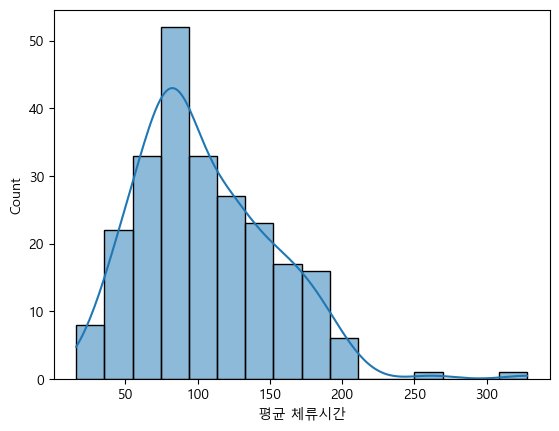

In [9]:
sns.histplot(data=basic_info['평균 체류시간'],kde=True)

<Axes: ylabel='평균 체류시간'>

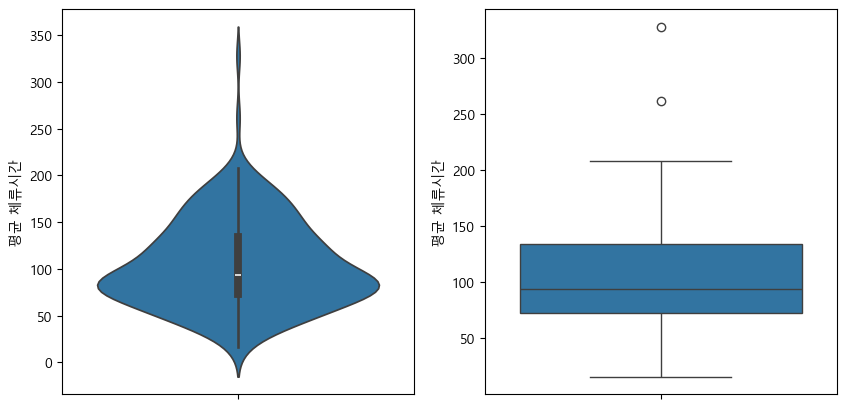

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.violinplot(data=basic_info['평균 체류시간'])

plt.subplot(1,2,2)
sns.boxplot(data=basic_info['평균 체류시간'])

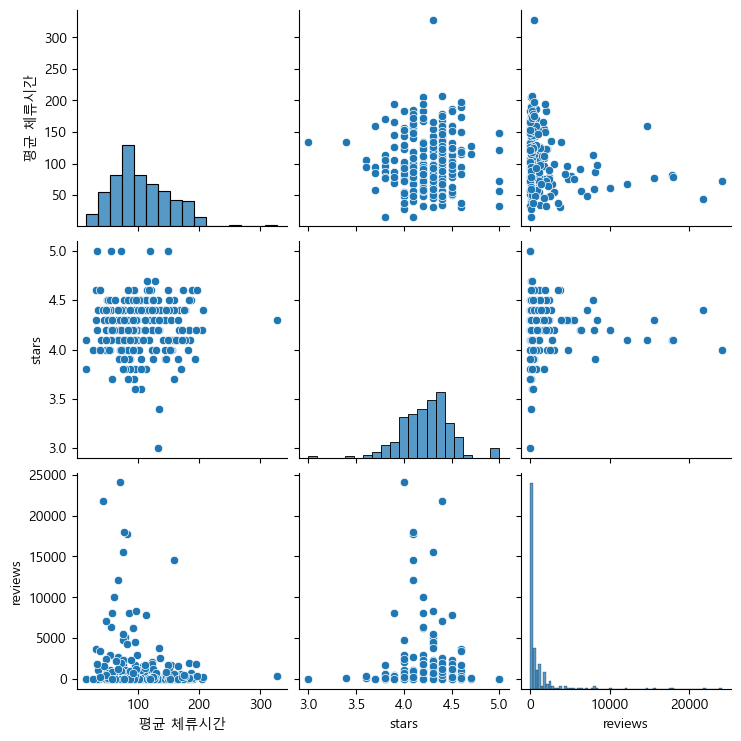

In [15]:
sns.pairplot(data=basic_info)

In [23]:
# =============================================================================================================

In [80]:
df = gender_info.groupby('관광지명').sum().reset_index()

In [81]:
df

,관광지명,연령대,남성방문 비율,여성방문 비율
0,168계단,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,48.8,51.3
1,40계단문화관광테마거리,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,53.5,46.5
2,BIFF광장,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,54.6,45.4
3,KT&G상상마당부산,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,55.2,44.9
4,SEALIFE부산아쿠아리움,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,45.8,54.2
...,...,...,...,...
234,화명수목원,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,49.5,50.6
235,화전공원,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,78.4,21.7
236,황령산,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,47.8,52.2
237,황령산전망대,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,55.0,44.9


In [86]:
df[['관광지명','남성방문 비율']].sort_values(by='남성방문 비율',ascending=False).head(10)

,관광지명,남성방문 비율
113,부산자원순환협력센터,83.1
6,가덕도등대,80.9
174,외양포포진지,80.3
235,화전공원,78.4
79,박태준기념관,77.4
88,부산국제수산물도매시장,73.0
154,안적사(부산),72.5
198,재난안전체험관,72.2
144,스포원파크,72.2
99,부산새벽시장,72.1


In [87]:
df[['관광지명','여성방문 비율']].sort_values(by='여성방문 비율',ascending=False).head(10)

,관광지명,여성방문 비율
31,금강암(부산),65.3
52,대각사(부산),61.9
127,삼광사,61.6
222,한국신발관,61.0
136,센텀APEC나루공원,58.4
223,해광사,57.9
67,마하사(부산),57.2
28,국청사(부산),57.1
216,킴스아트필드미술관,57.1
238,흰여울문화마을,56.6


In [92]:
# ===================================================================================================

In [ ]:
navi_info

In [78]:
totals = []
avgs = []

for i in range(len(navi_info)):
    total = navi_info.iloc[i][1:].sum()
    avg = navi_info.iloc[i][1:].mean()
    
    totals.append(total)
    avgs.append(avg)

In [79]:
navi_info['sum'] = totals
navi_info['avg'] = avgs

In [80]:
navi_info

,관광지명,202301,202302,202303,202304,202305,202306,202307,202308,202309,202310,202311,202312,sum,avg
0,168계단,26.0,30.0,23.0,12.0,14.0,15.0,25.0,12.0,3.0,16.0,14.0,13.0,203.0,16.916667
1,40계단문화관광테마거리,16.0,31.0,33.0,29.0,29.0,6.0,29.0,16.0,40.0,35.0,59.0,29.0,352.0,29.333333
2,BIFF광장,398.0,397.0,278.0,279.0,279.0,29.0,8.0,112.0,321.0,444.0,327.0,480.0,3352.0,279.333333
3,KT&G상상마당부산,1402.0,1185.0,928.0,1094.0,1642.0,3050.0,3621.0,3813.0,2545.0,2042.0,1438.0,1944.0,24704.0,2058.666667
4,SEALIFE부산아쿠아리움,4067.0,4155.0,2768.0,3603.0,5161.0,3709.0,5612.0,6673.0,3656.0,3148.0,2701.0,4588.0,49841.0,4153.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,화명수목원,602.0,766.0,1340.0,1791.0,1541.0,1555.0,1003.0,997.0,1136.0,1992.0,1923.0,664.0,15310.0,1275.833333
235,화전공원,32.0,38.0,25.0,29.0,29.0,19.0,29.0,22.0,24.0,34.0,50.0,22.0,353.0,29.416667
236,황령산,425.0,416.0,569.0,373.0,373.0,66.0,22.0,148.0,500.0,608.0,527.0,449.0,4476.0,373.000000
237,황령산전망대,2587.0,2303.0,3700.0,3144.0,2447.0,2670.0,2464.0,3278.0,3297.0,3826.0,3130.0,2780.0,35626.0,2968.833333


In [ ]:
navi_info[['관광지명','sum']].sort_values(by='sum',ascending=True)[:60]

In [ ]:
navi_info[['관광지명','avg']].sort_values(by='avg',ascending=False)[:60]

===============================================================================================================

===============================================================================================================

===============================================================================================================

In [50]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time
from selenium.webdriver.common.action_chains import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

search_number = []
for i in basic_info['관광지명']:
    if not i.startswith('부산'):
        i = '부산 ' + i
    url = f'https://www.google.com/search?q={i}'
    service = Service(executable_path='./data/chromedriver.exe')
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
    time.sleep(2)

    search_number.append(driver.find_element(By.ID, 'result-stats').text)

basic_info['search_number'] = search_number

In [72]:
search_number = []
for index,i in enumerate(basic_info['관광지명']):
    if basic_info.iloc[index]['search_number']:
        continue
    if not i.startswith('부산'):
        i = '부산 ' + i
    url = f'https://www.google.com/search?q={i}'
    service = Service(executable_path='./data/chromedriver.exe')
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
    time.sleep(2)

    # search_number.append(driver.find_element(By.ID, 'result-stats').text)
    basic_info.loc[index,'search_number'] = driver.find_element(By.ID, 'result-stats').text

In [105]:
import re

pattern = re.compile(r'\([^)]*\)')

basic_info['search_number'] = basic_info['search_number'].apply(lambda x: re.sub(pattern, '', x))
basic_info['search_number'] = basic_info['search_number'].apply(lambda x: x[7:-1])

In [109]:
basic_info['search_number'] = basic_info['search_number'].apply(lambda x: re.sub(r'개', '', x))

In [115]:
basic_info['search_number'] = basic_info['search_number'].apply(lambda x: int(x.replace(',','')))

In [129]:
basic_info.to_csv('./data_2/basic_info_with_reviews.csv',encoding='utf-8',index=False)

===============================================================================================================

===============================================================================================================

===============================================================================================================

In [1]:
import pandas as pd

In [112]:
basic_info = pd.read_csv('./부산/basic_info.csv')
gender_info = pd.read_csv('./부산/gender_info.csv')
navi_info = pd.read_csv('./부산/navi_info.csv')
visit_info = pd.read_csv('./부산/visit_info.csv')
location_info = pd.read_csv('./부산/location_info.csv')

In [113]:
visit_info.dropna(subset=['광역지자체명'], axis=0,inplace=True)
names = visit_info['관광지명'].tolist()

local_visit = visit_info[visit_info['광역지자체명'].str.contains('부산')].groupby('관광지명')[['광역지자체별 거주 방문자 비율']].mean()
local_visit = local_visit.reset_index()

In [114]:
basic_info['광역지자체별 거주 방문자 비율'] = local_visit['광역지자체별 거주 방문자 비율']

In [115]:
totals = []
avgs = []

for i in range(len(navi_info)):
    total = navi_info.iloc[i][1:].sum()
    avg = navi_info.iloc[i][1:].mean()
    
    totals.append(total)
    avgs.append(avg)
navi_info['sum'] = totals
navi_info['avg'] = avgs

In [116]:
location_info = location_info.rename(columns={'CONT_NM': '관광지명', 'TAR_ADDR_NM': '주소', 'KTO_CATE_LCLS_NM': '대분류', 'KTO_CATE_MCLS_NM': '중분류', 'KTO_CATE_SCLS_NM': '소분류', 'XCRD' : 'longitude', 'YCRD' : 'latitude'})

In [117]:
import re

pattern = re.compile(r'\([^)]*\)')

basic_info['관광지명'] = basic_info['관광지명'].apply(lambda x: re.sub(pattern, '', x))
location_info['관광지명'] = location_info['관광지명'].apply(lambda x: re.sub(pattern, '', x))
visit_info['관광지명'] = visit_info['관광지명'].apply(lambda x: re.sub(pattern, '', x))

In [118]:
df = pd.DataFrame()

In [119]:
df = pd.concat([basic_info,navi_info[['sum','avg']]],axis=1)

In [120]:
df = pd.merge(df,location_info,on='관광지명',how='inner')

In [121]:
df.describe()

,평균 체류시간,stars,reviews,search_number,광역지자체별 거주 방문자 비율,sum,avg,longitude,latitude
count,239.000000,233.000000,233.00000,2.390000e+02,239.000000,239.000000,239.000000,239.000000,239.000000
mean,104.920502,4.244206,1385.04721,7.520314e+05,62.297908,16550.447699,1379.203975,129.072049,35.163086
std,46.716897,0.273031,3375.29869,2.589280e+06,14.161516,37049.609650,3087.467471,0.093770,0.076956
min,16.000000,3.000000,1.00000,6.700000e+02,20.800000,36.000000,3.000000,128.809631,35.000647
25%,73.000000,4.100000,48.00000,2.695000e+04,53.800000,542.000000,45.166667,129.027611,35.104642
50%,94.000000,4.300000,203.00000,1.090000e+05,65.700000,3183.000000,265.250000,129.062351,35.154317
75%,134.500000,4.400000,1063.00000,3.435000e+05,73.150000,12807.000000,1067.250000,129.116345,35.213901
max,328.000000,5.000000,24051.00000,3.220000e+07,87.900000,235888.000000,19657.333333,129.276526,35.376051


In [164]:
df_lp = df[(df['stars']>=4.3)&(df['reviews']<=203)&(df['search_number']<=109000)]

In [165]:
df_lp = df_lp[(~df_lp['관광지명'].str.contains('산'))]

In [205]:
import folium

busan_map = folium.Map(location=[35.115225,129.042243],zoom_start=11)

In [207]:
for i in range(len(df['관광지명'])):
    folium.Marker(
            [df.iloc[i]['latitude'],df.iloc[i]['longitude']],
            popup=folium.Popup(df.iloc[i]['관광지명'],maxWidth=300),
            fill_opacity=0.5,
            icon=folium.Icon(color='blue')            
            ).add_to(busan_map)

In [208]:
busan_map

In [123]:
df = df.dropna()

In [191]:
df['소분류'].unique()

array(['이색거리', '이색체험', '전시관', '동굴', '등대', '산', '공원', '상설시장', '해수욕장', '사찰',
       '문화전수시설', '자연생태관광지', '테마공원', '자연휴양림', '박물관', '유람선/잠수함관광', '수목원',
       '성', '유적지/사적지', '기념탑/기념비/전망대', '항구/포구', '유명건물', '섬', '기념관', '해안절경',
       '미술관/화랑', '관광단지', '유원지', '컨벤션센터', '온천/욕장/스파', '농.산.어촌 체험'],
      dtype=object)

In [233]:
import numpy as np
score = []

for i in range(len(df)):
    star = df.iloc[i]['stars'] * 1.2
    review = np.log1p(max(df['reviews'])) - np.log1p(df.iloc[i]['reviews']) * 1.1
    search = np.log1p(max(df['search_number'])) - np.log1p(df.iloc[i]['search_number'])
    visit = np.log1p(df.iloc[i]['광역지자체별 거주 방문자 비율']) * 1.1
    time = np.log1p(df.iloc[i]['평균 체류시간']) * 0.8
    navi = np.log1p(max(df['avg'])) - np.log1p(df.iloc[i]['avg'])
    all = star+review+search+visit+time-navi
    if df.iloc[i]['소분류'] == '산':
        score.append(all*0.9)
    elif df.iloc[i]['소분류'] == '사찰':
        score.append(all*0.9)
    else:
        score.append(all)

df['scores'] = score

In [234]:
df[df['관광지명']=='명지동근린공원']

,관광지명,주소_x,평균 체류시간,stars,reviews,search_number,광역지자체별 거주 방문자 비율,sum,avg,주소_y,대분류,중분류,소분류,longitude,latitude,scores
70,명지동근린공원,부산광역시 강서구,164,4.1,8.0,23200,62.5,6641.0,553.416667,부산광역시 강서구 명지오션시티10로 95,인문(문화/예술/역사),휴양관광지,공원,128.906657,35.087033,24.909113


In [235]:
first = df.sort_values(by='scores',ascending=False)

In [236]:
first['관광지명'].head(40)

70         명지동근린공원
215            칠암항
220            학리항
149          아미르공원
96        부산복천동고분군
68     만덕고개누리길전망데크
19         구덕민속예술관
120          부산충렬사
199       재한유엔기념공원
179         우장춘기념관
163        영도하리선착장
216      킴스아트필드미술관
192         임랑해수욕장
137          소두방공원
194         장림골목시장
21       구포어린이교통공원
55        대저수문생태공원
174         외양포포진지
221     한국기독교선교박물관
157           연동시장
79          박태준기념관
141         송정해수욕장
178         우암동도시숲
98        부산부평족발골목
49         다대포해수욕장
107        부산어촌민속관
236            황령산
48            다대포항
40          김민부전망대
211         청학수변공원
168         오륜대전망대
90          부산동명불원
131          서면1번가
152       안데르센동화마을
77             미포항
47        누리바라기전망대
154            안적사
189            이동항
14            곰내연밭
175          요산문학관
Name: 관광지명, dtype: object

In [237]:
import folium

busan_map = folium.Map(location=[35.115225,129.042243],zoom_start=11)

In [238]:
for i in range(len(first)):
    if i == 30:
        break
    folium.Marker(
            [first.iloc[i]['latitude'],first.iloc[i]['longitude']],
            popup=folium.Popup(first.iloc[i]['관광지명'],maxWidth=300),
            fill_opacity=0.5,
            icon=folium.Icon(color='blue')            
            ).add_to(busan_map)

In [241]:
busan_map